In [1]:
from learning_lidar.utils import utils, xr_utils, vis_utils, misc_lidar, proc_utils, global_settings as gs
import matplotlib.pyplot as plt
import learning_lidar.generation.generation_utils as gen_utils
from datetime import datetime, timedelta
import learning_lidar.generation.generate_density_utils as gen_den_utils
from learning_lidar.generation.generate_bg_signals_utils import plot_bg_one_day, plot_bg_part_of_year
from learning_lidar.generation.generate_LC_pattern import generate_LC_pattern_main
import os

In [2]:
station_name = 'haifa_shubi'
the_date = '2017-09-01'
station = gs.Station(station_name)
day_date  = datetime.fromisoformat(the_date)

ds_day_params = gen_utils.get_daily_gen_param_ds(station=station, day_date=day_date, type_='density_params')

# daily_bg_params = gen_utils.get_daily_gen_param_ds(station=station, day_date=day_date, type_='bg')
# month_bg_params_ds = gen_utils.get_month_gen_params_ds(station, day_date, type_='bg')
bg_year_params_path = os.path.join(station.generation_folder, f'generated_bg_{station.name}_2017-01-01_2017-12-31.nc')
bg_year_params_ds = xr_utils.load_dataset(bg_year_params_path)

signal_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='signal')
lidar_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='lidar')
aerosol_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='aerosol')
# density_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='density') # TODO uncomment if have density

gen_den_utils.PLOT_RESULTS = True

In [3]:
# TODO KM units straight not italian - \rm before km for all
# For example:  aerosol_ds.sigma.Height['units'] = r"$\rm km$"

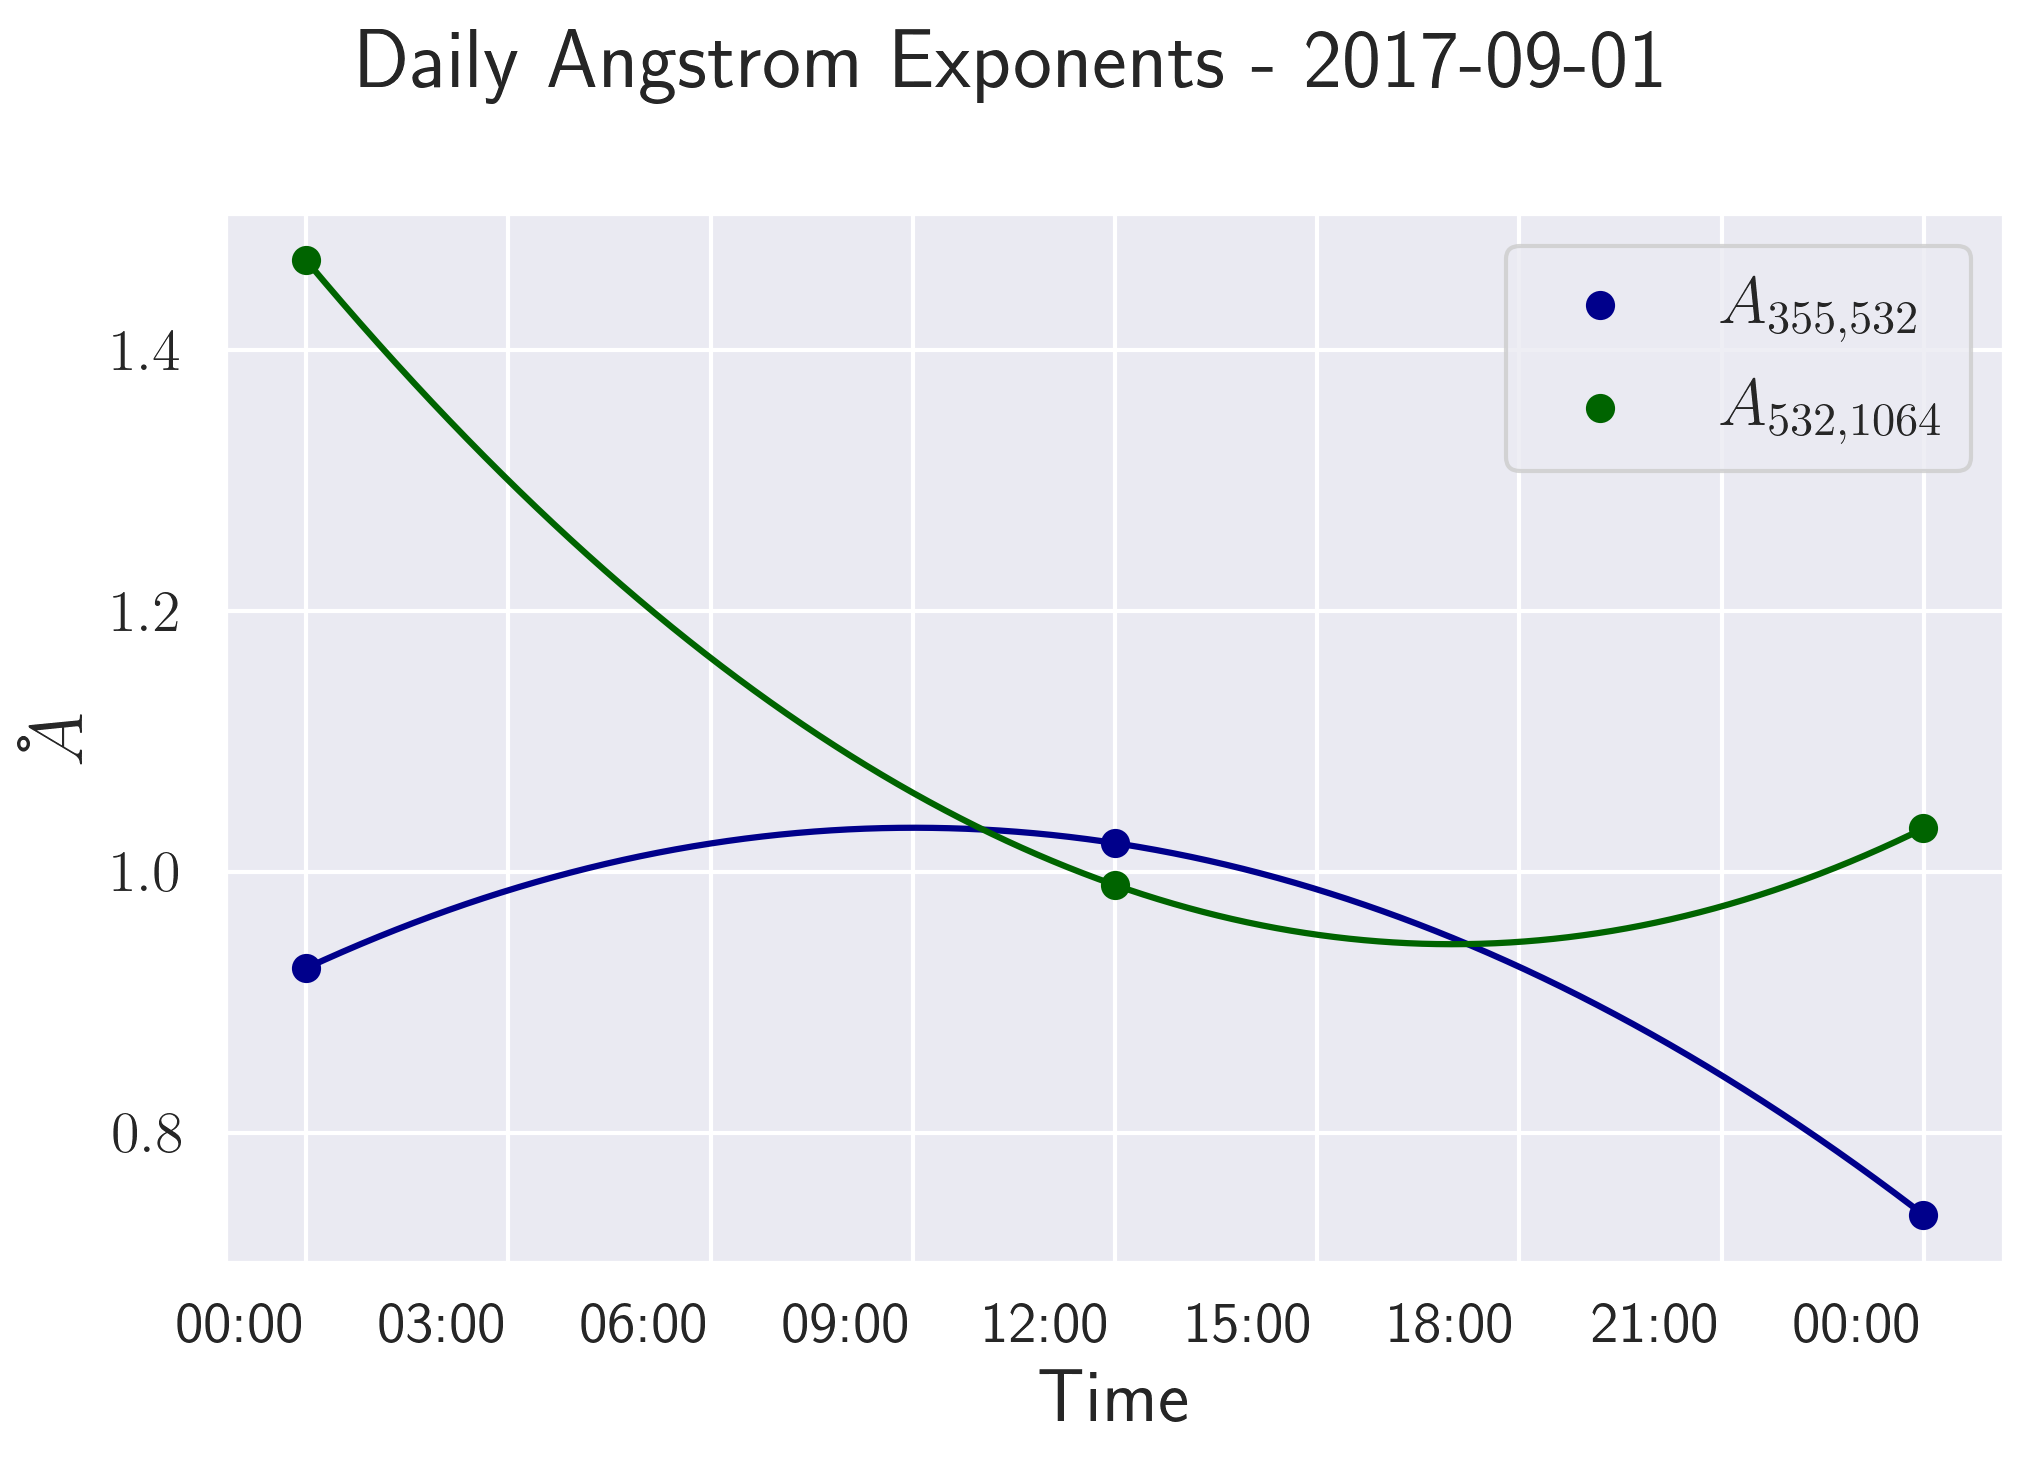

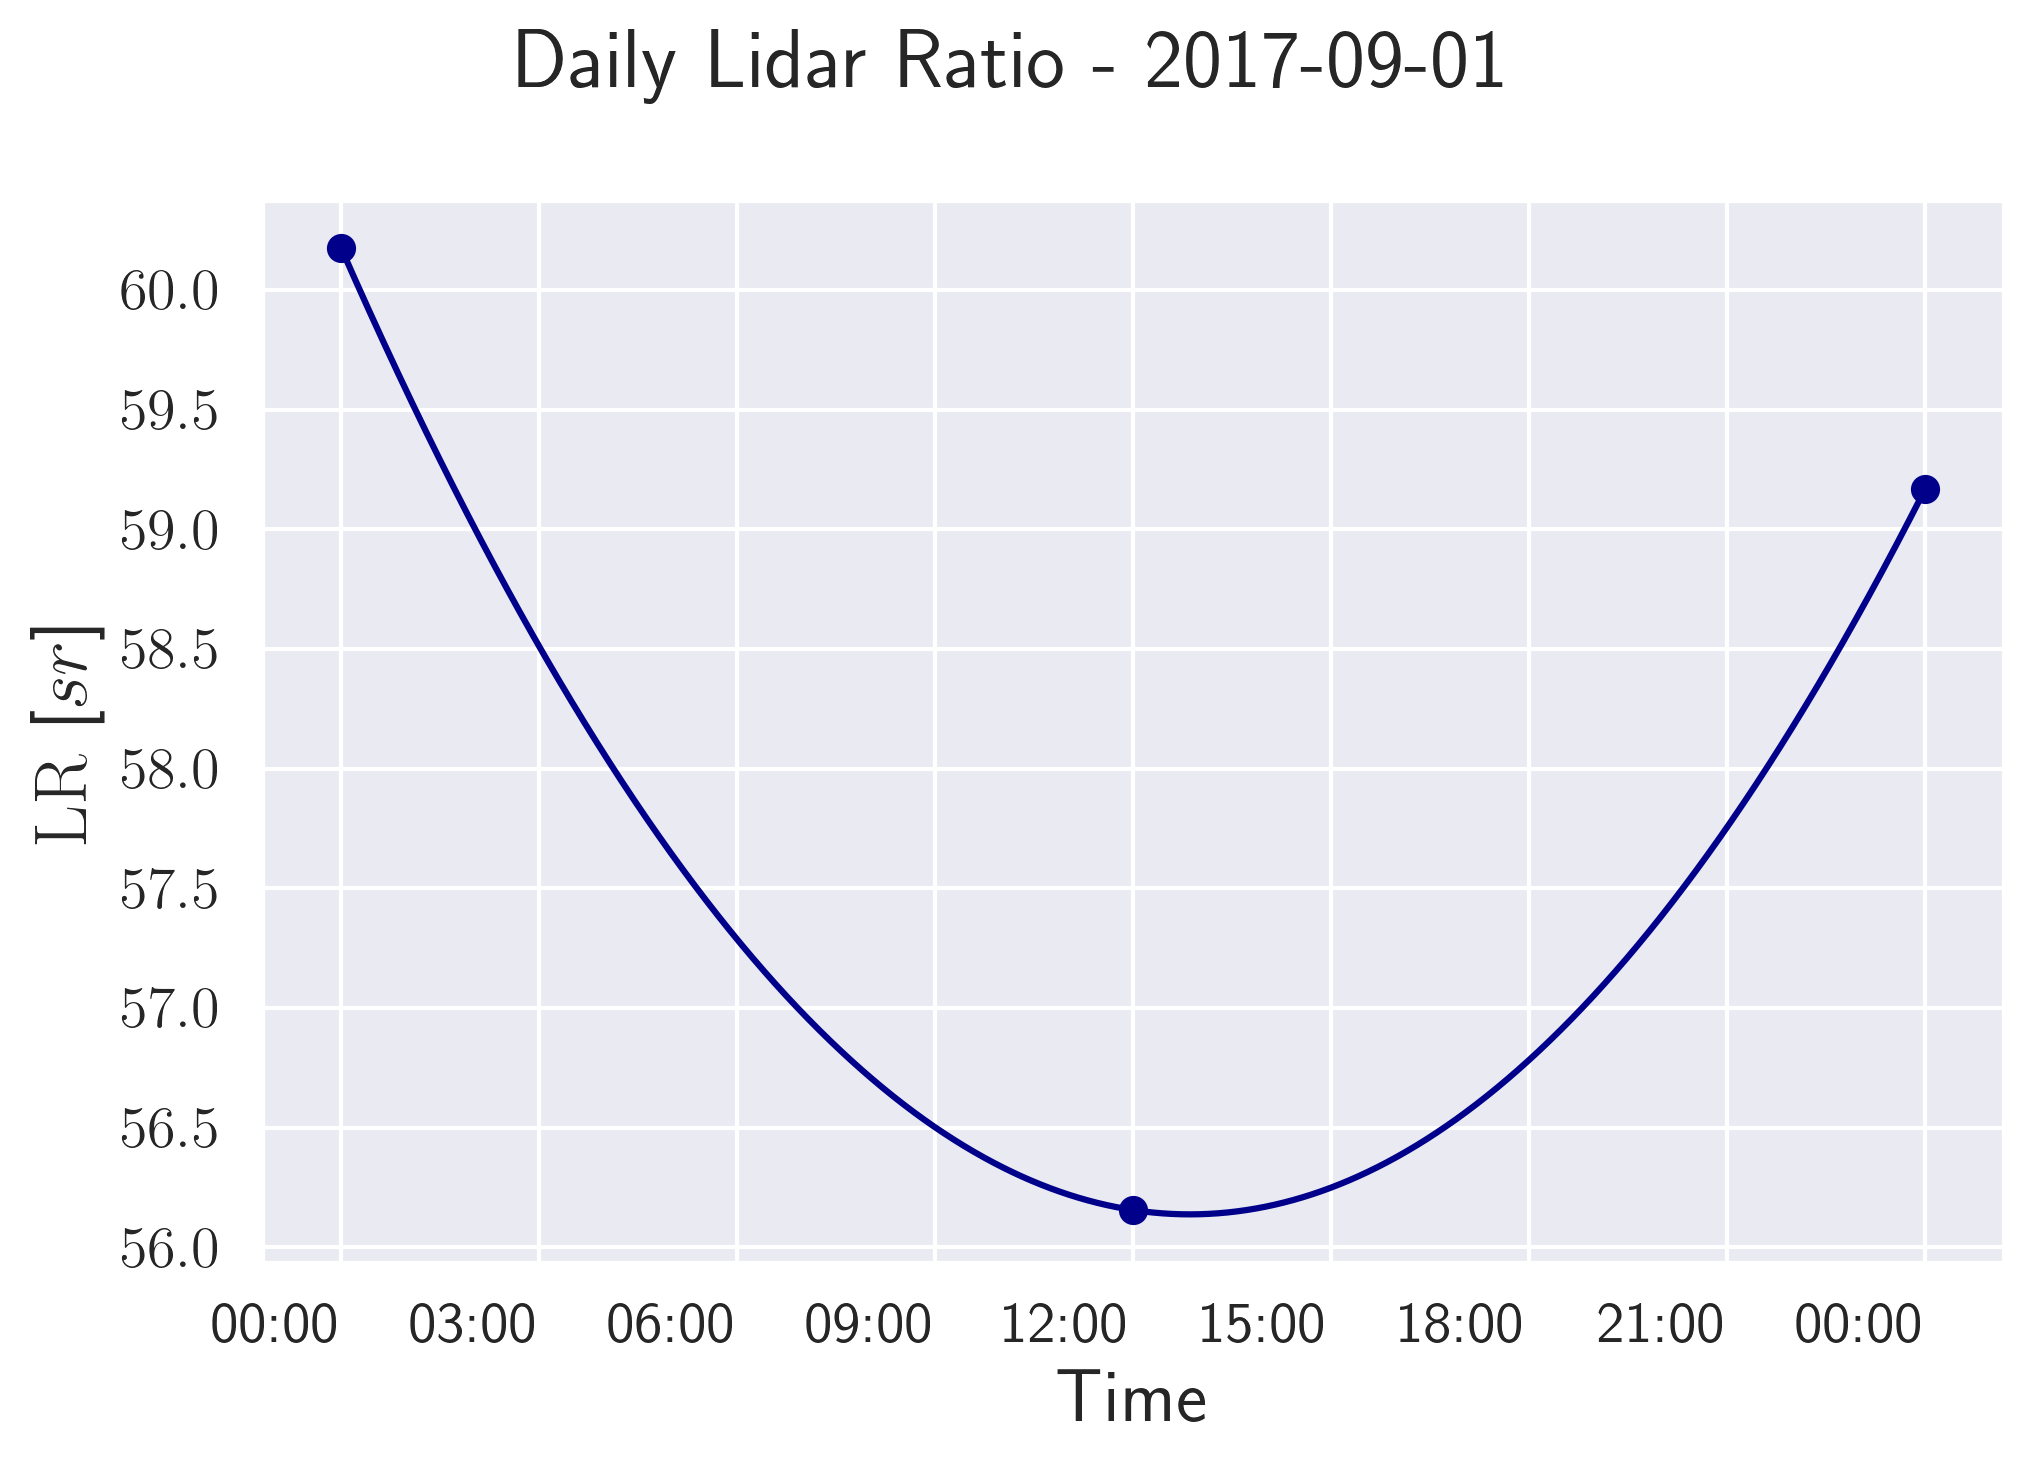

saved fig Dailyaerosolsgeneratedbackscattercoefficient20170901


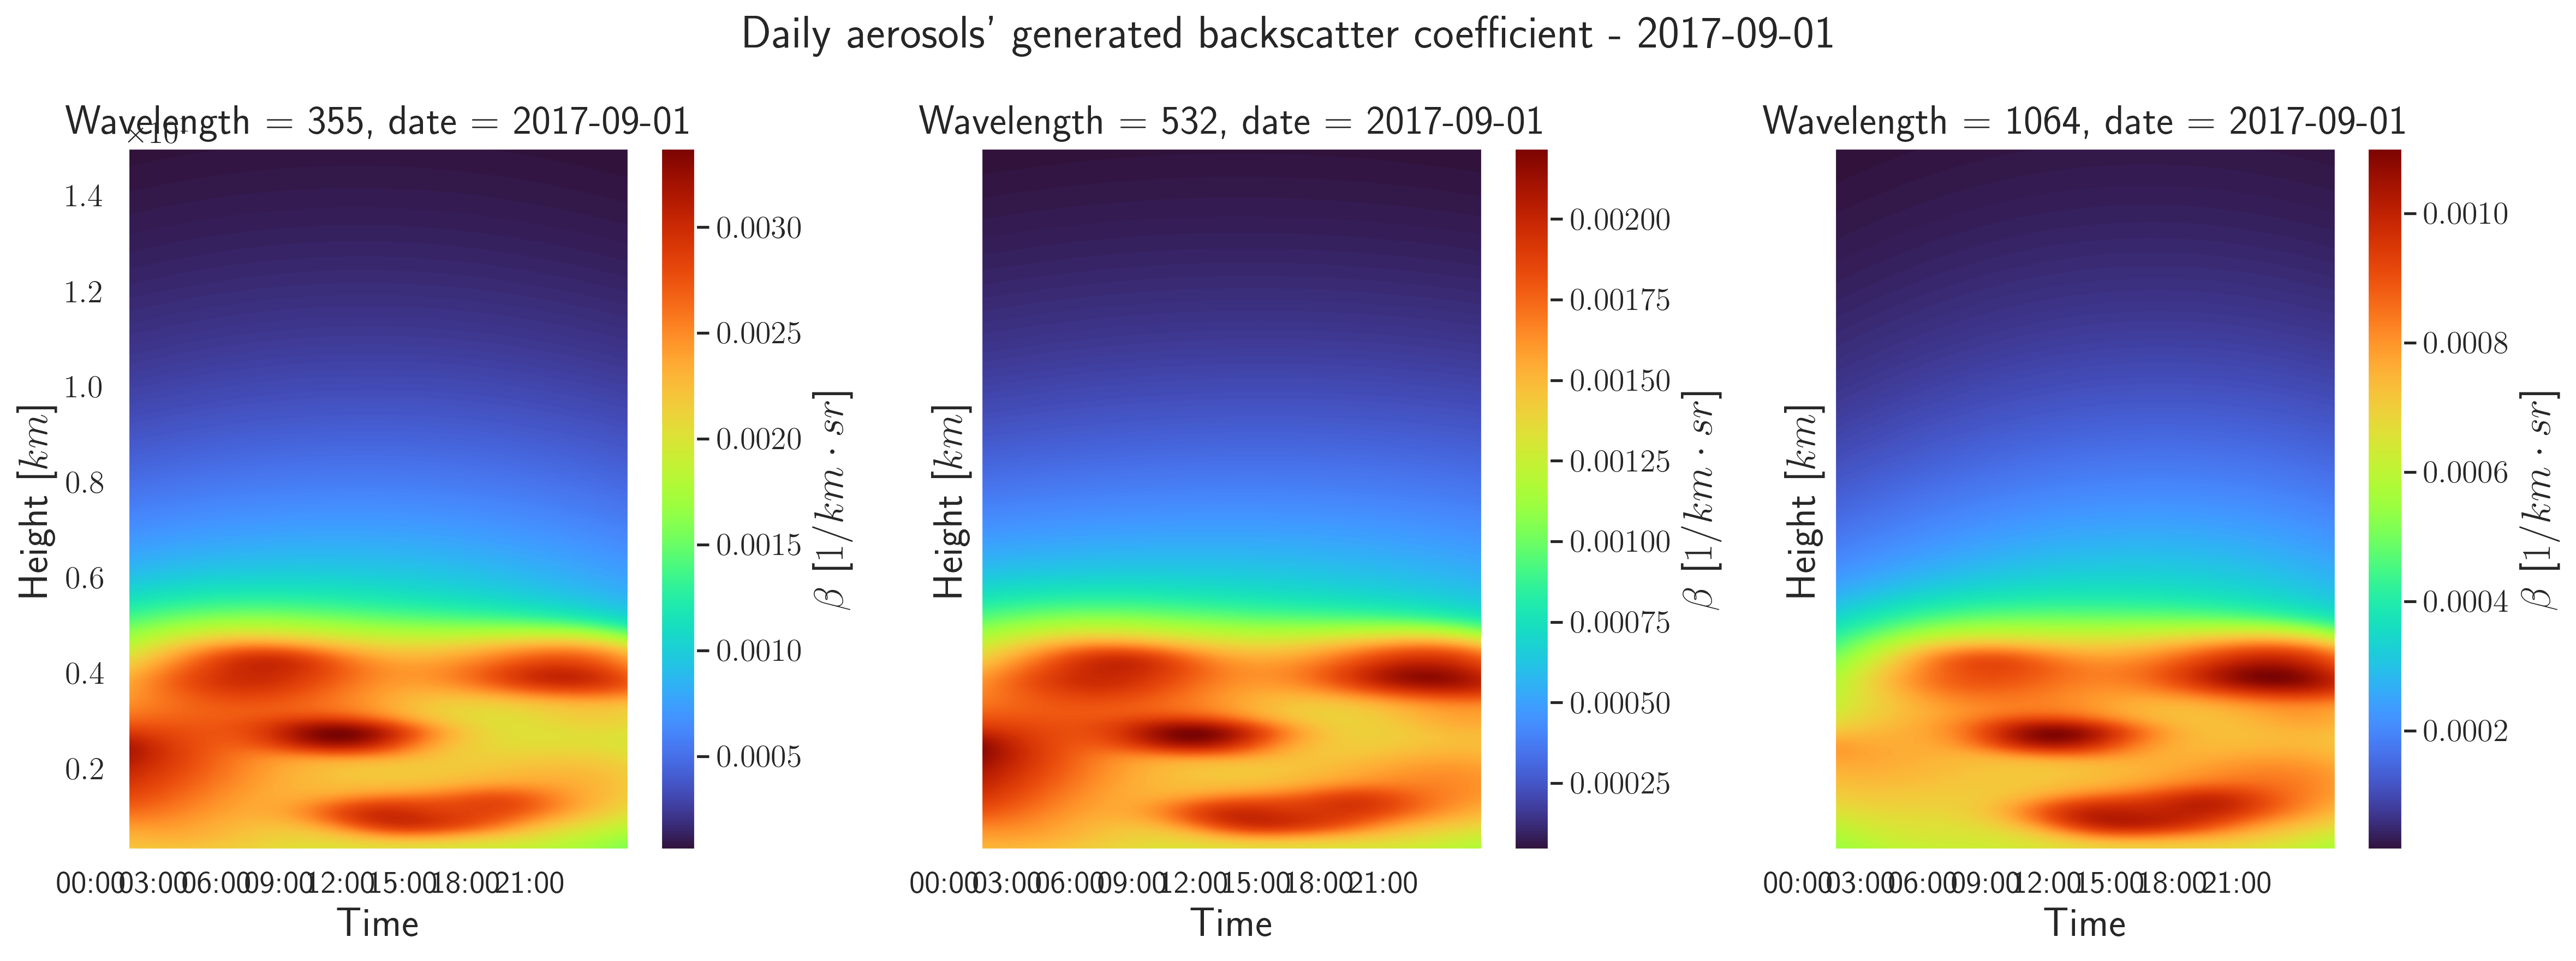

saved fig Dailyaerosolsgeneratedextinctioncoefficient20170901


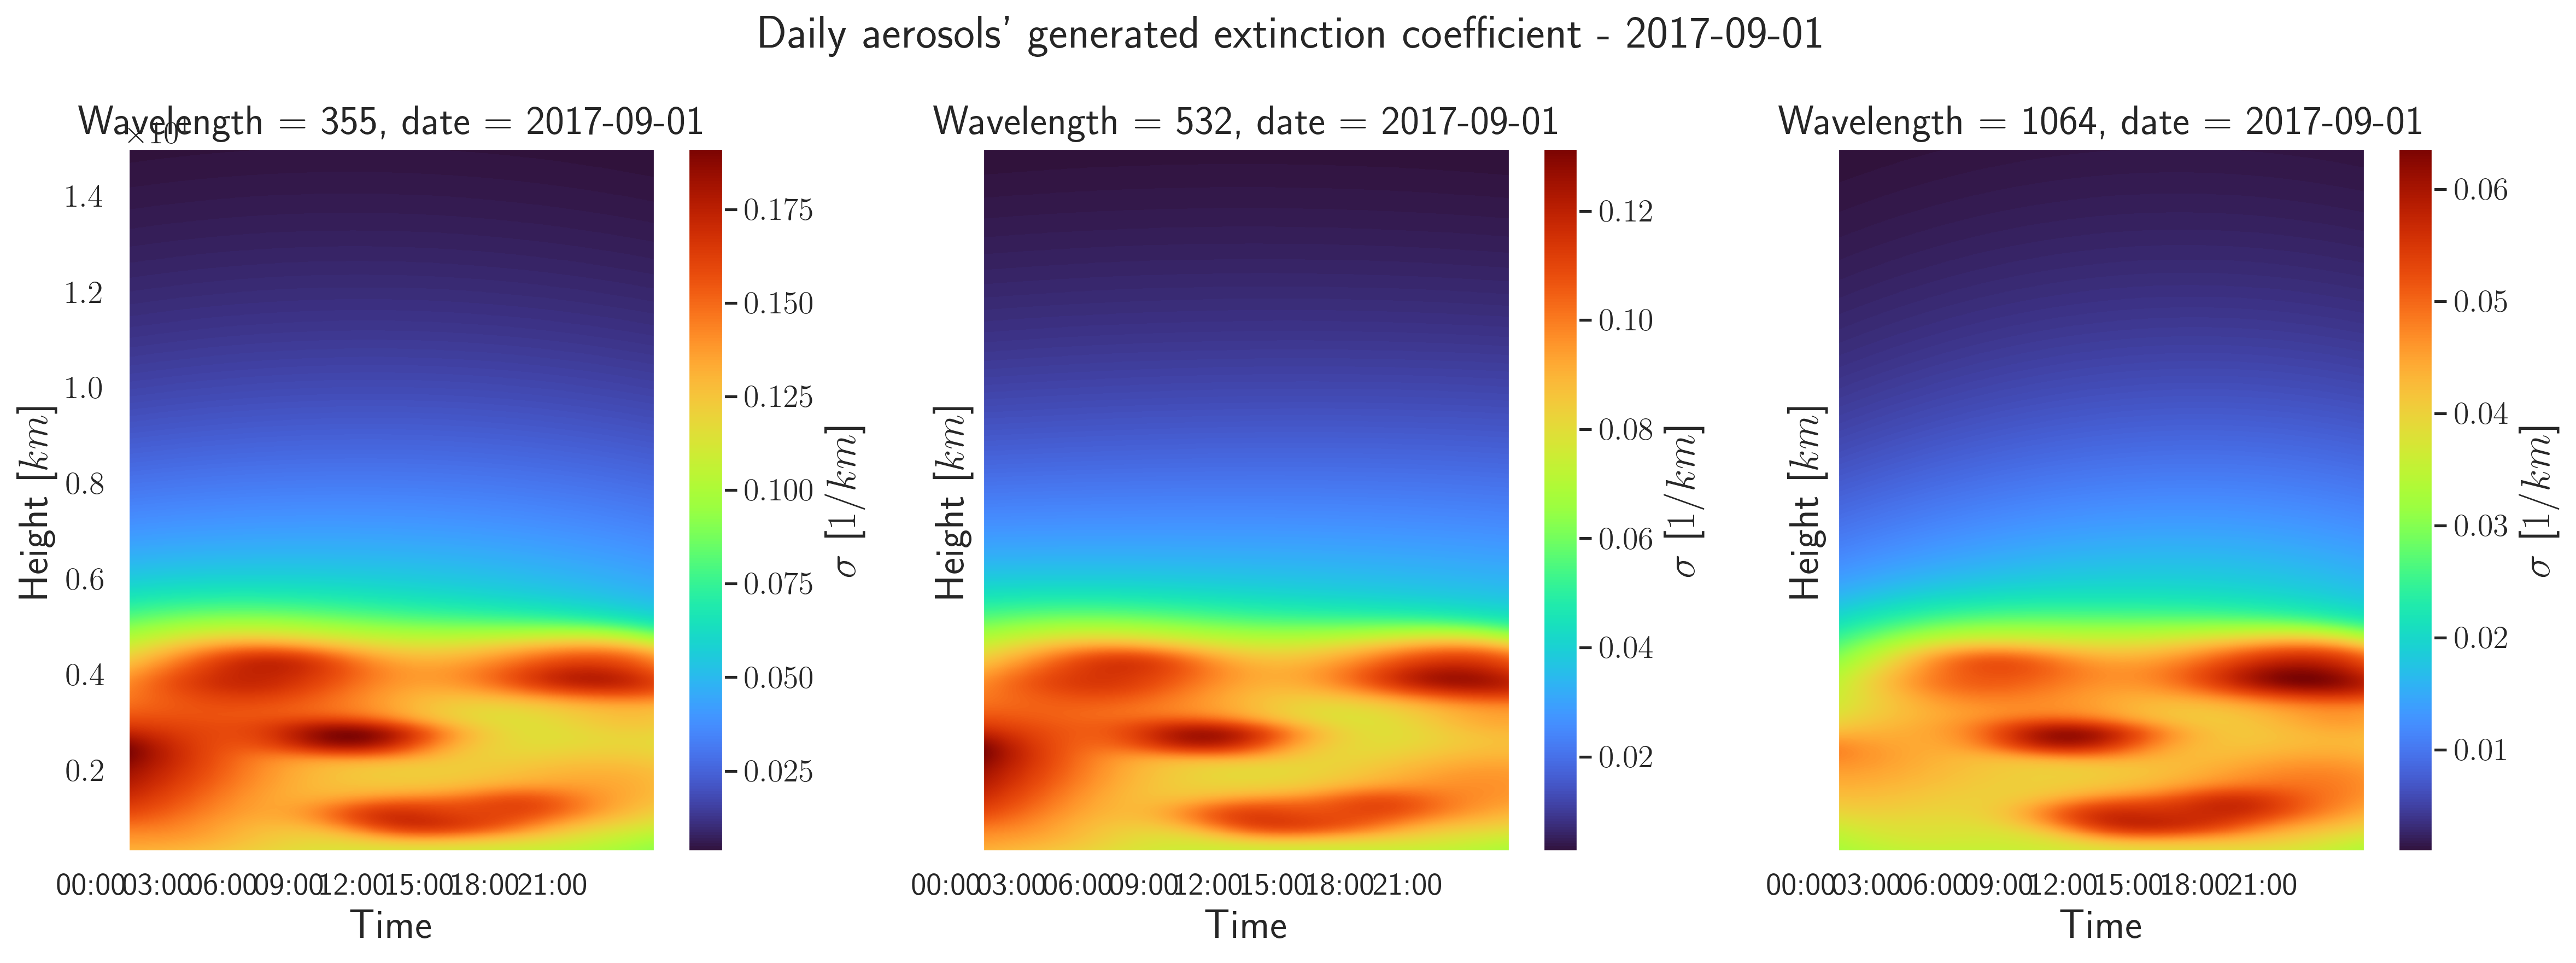

saved fig Dailytotalattenuatedbackscattercoefficient20170901


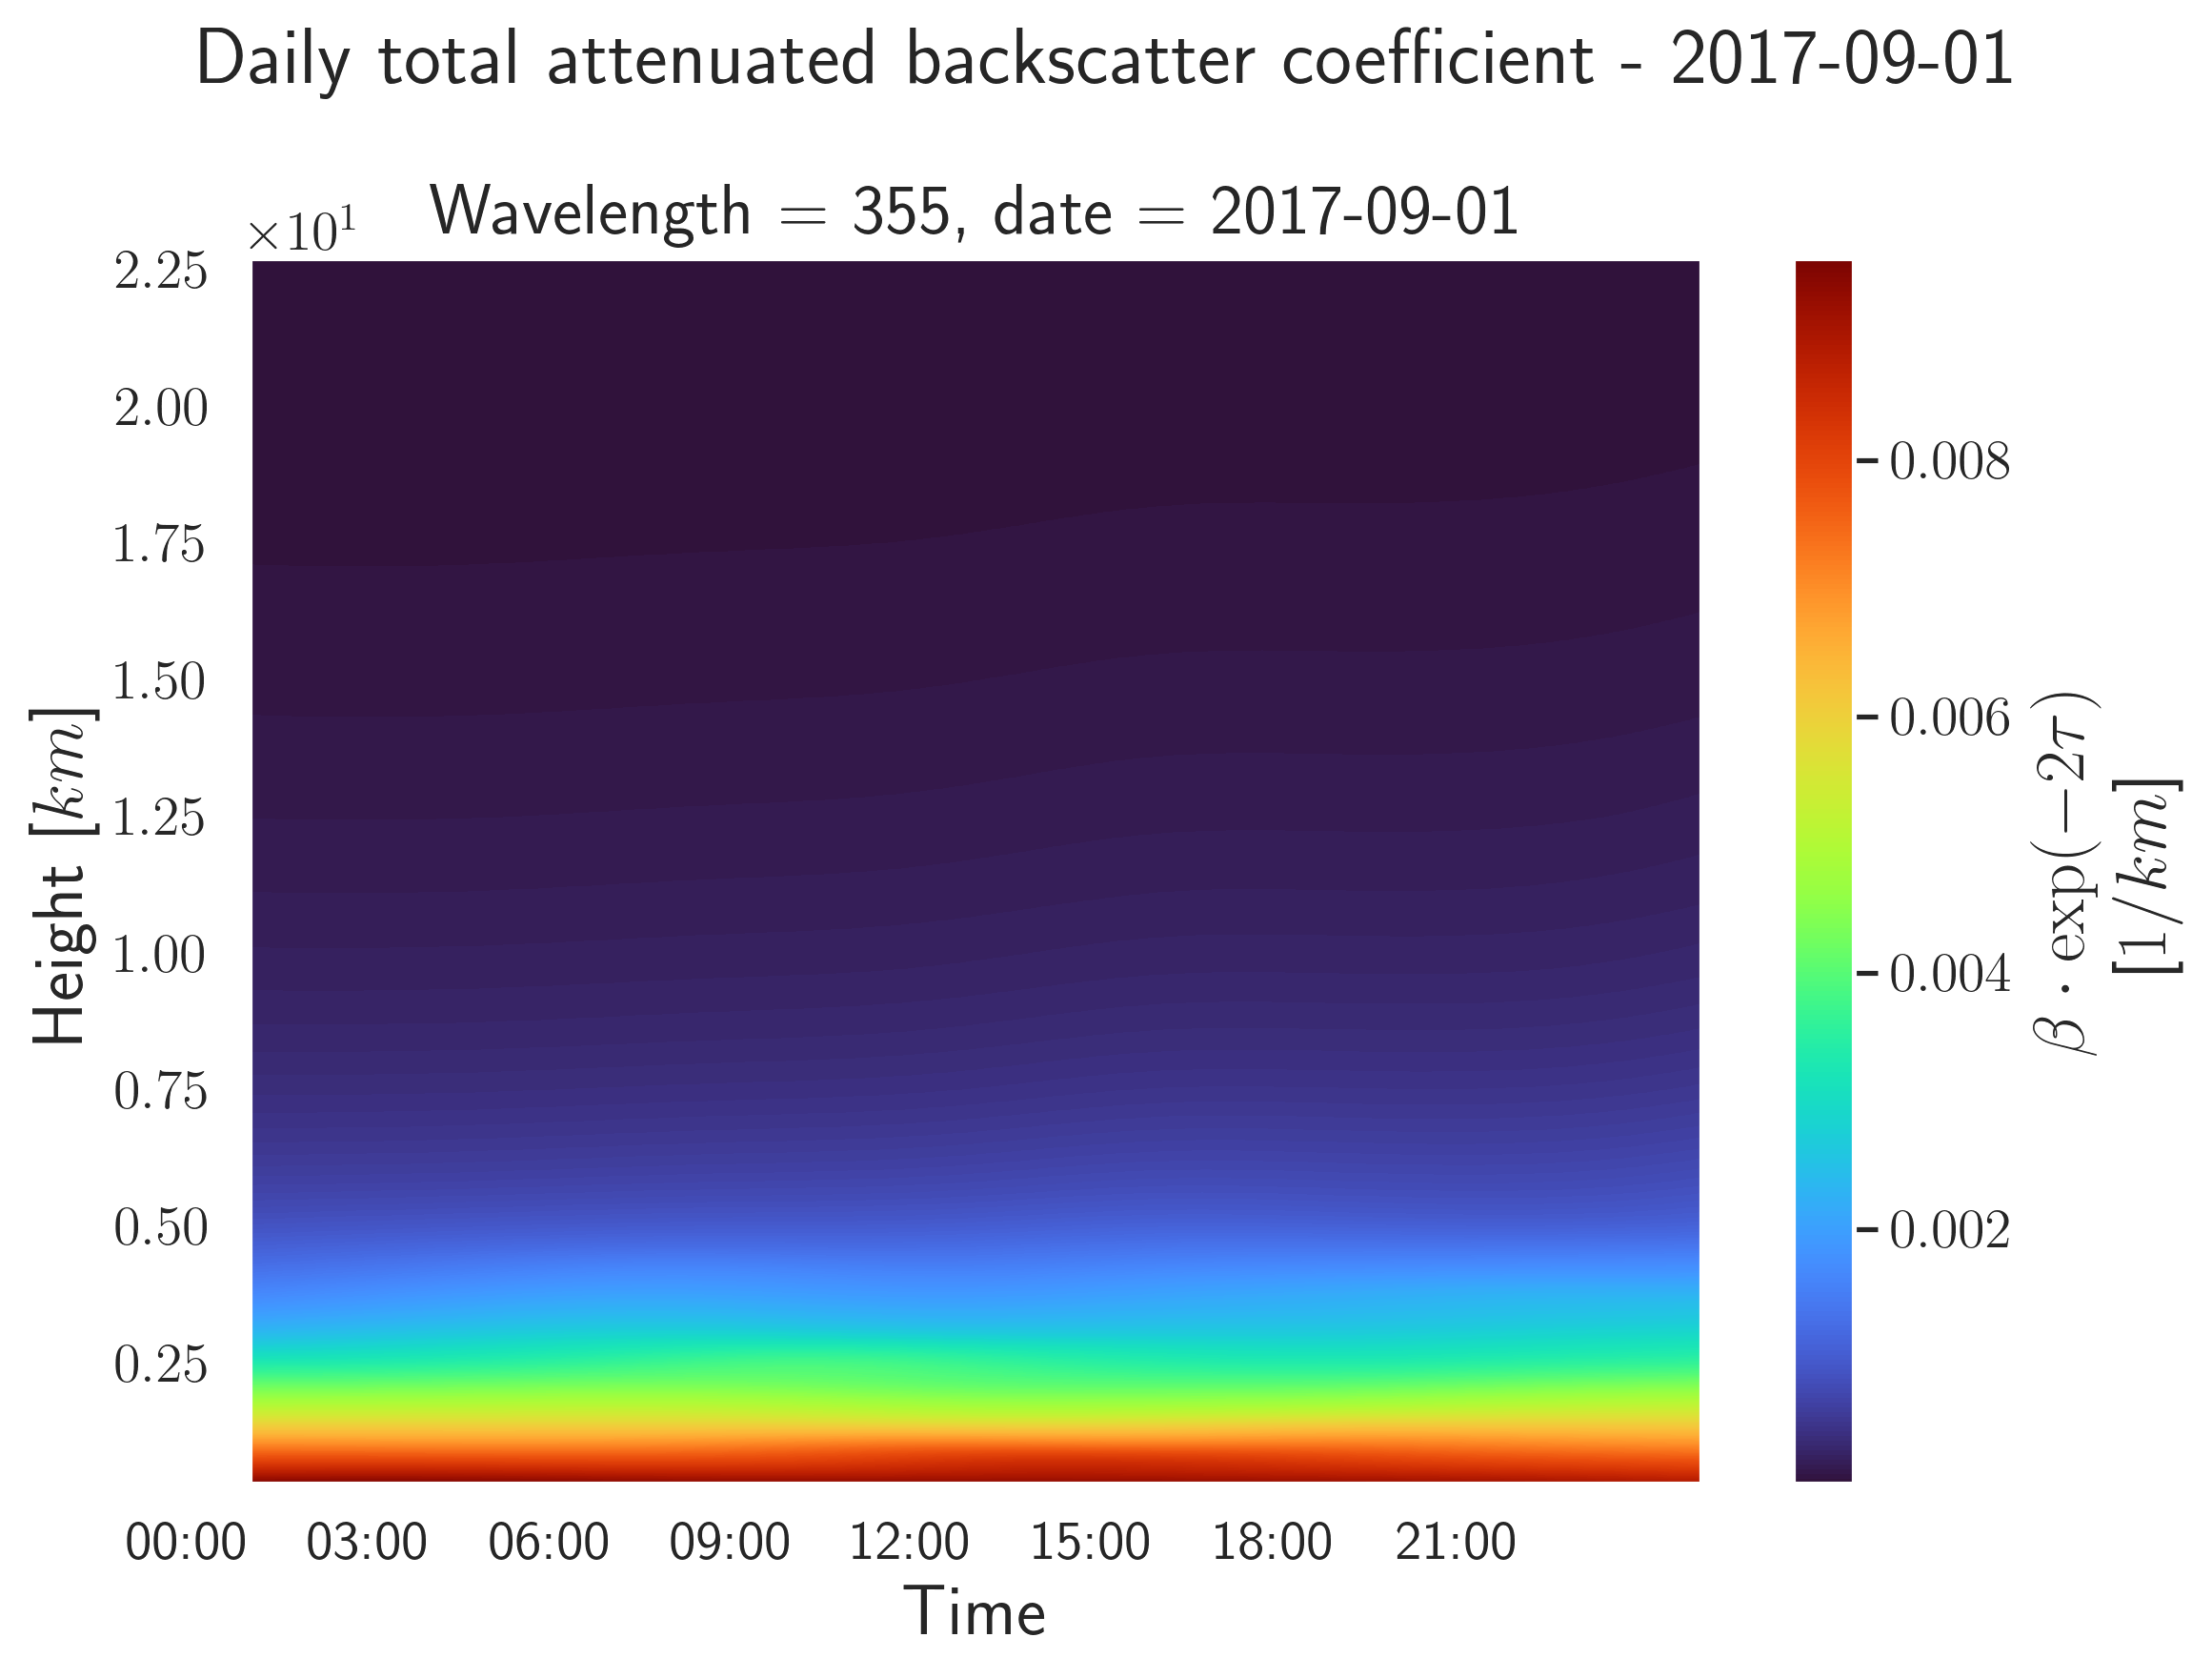

saved fig Dailytotalattenuatedbackscattercoefficient20170901


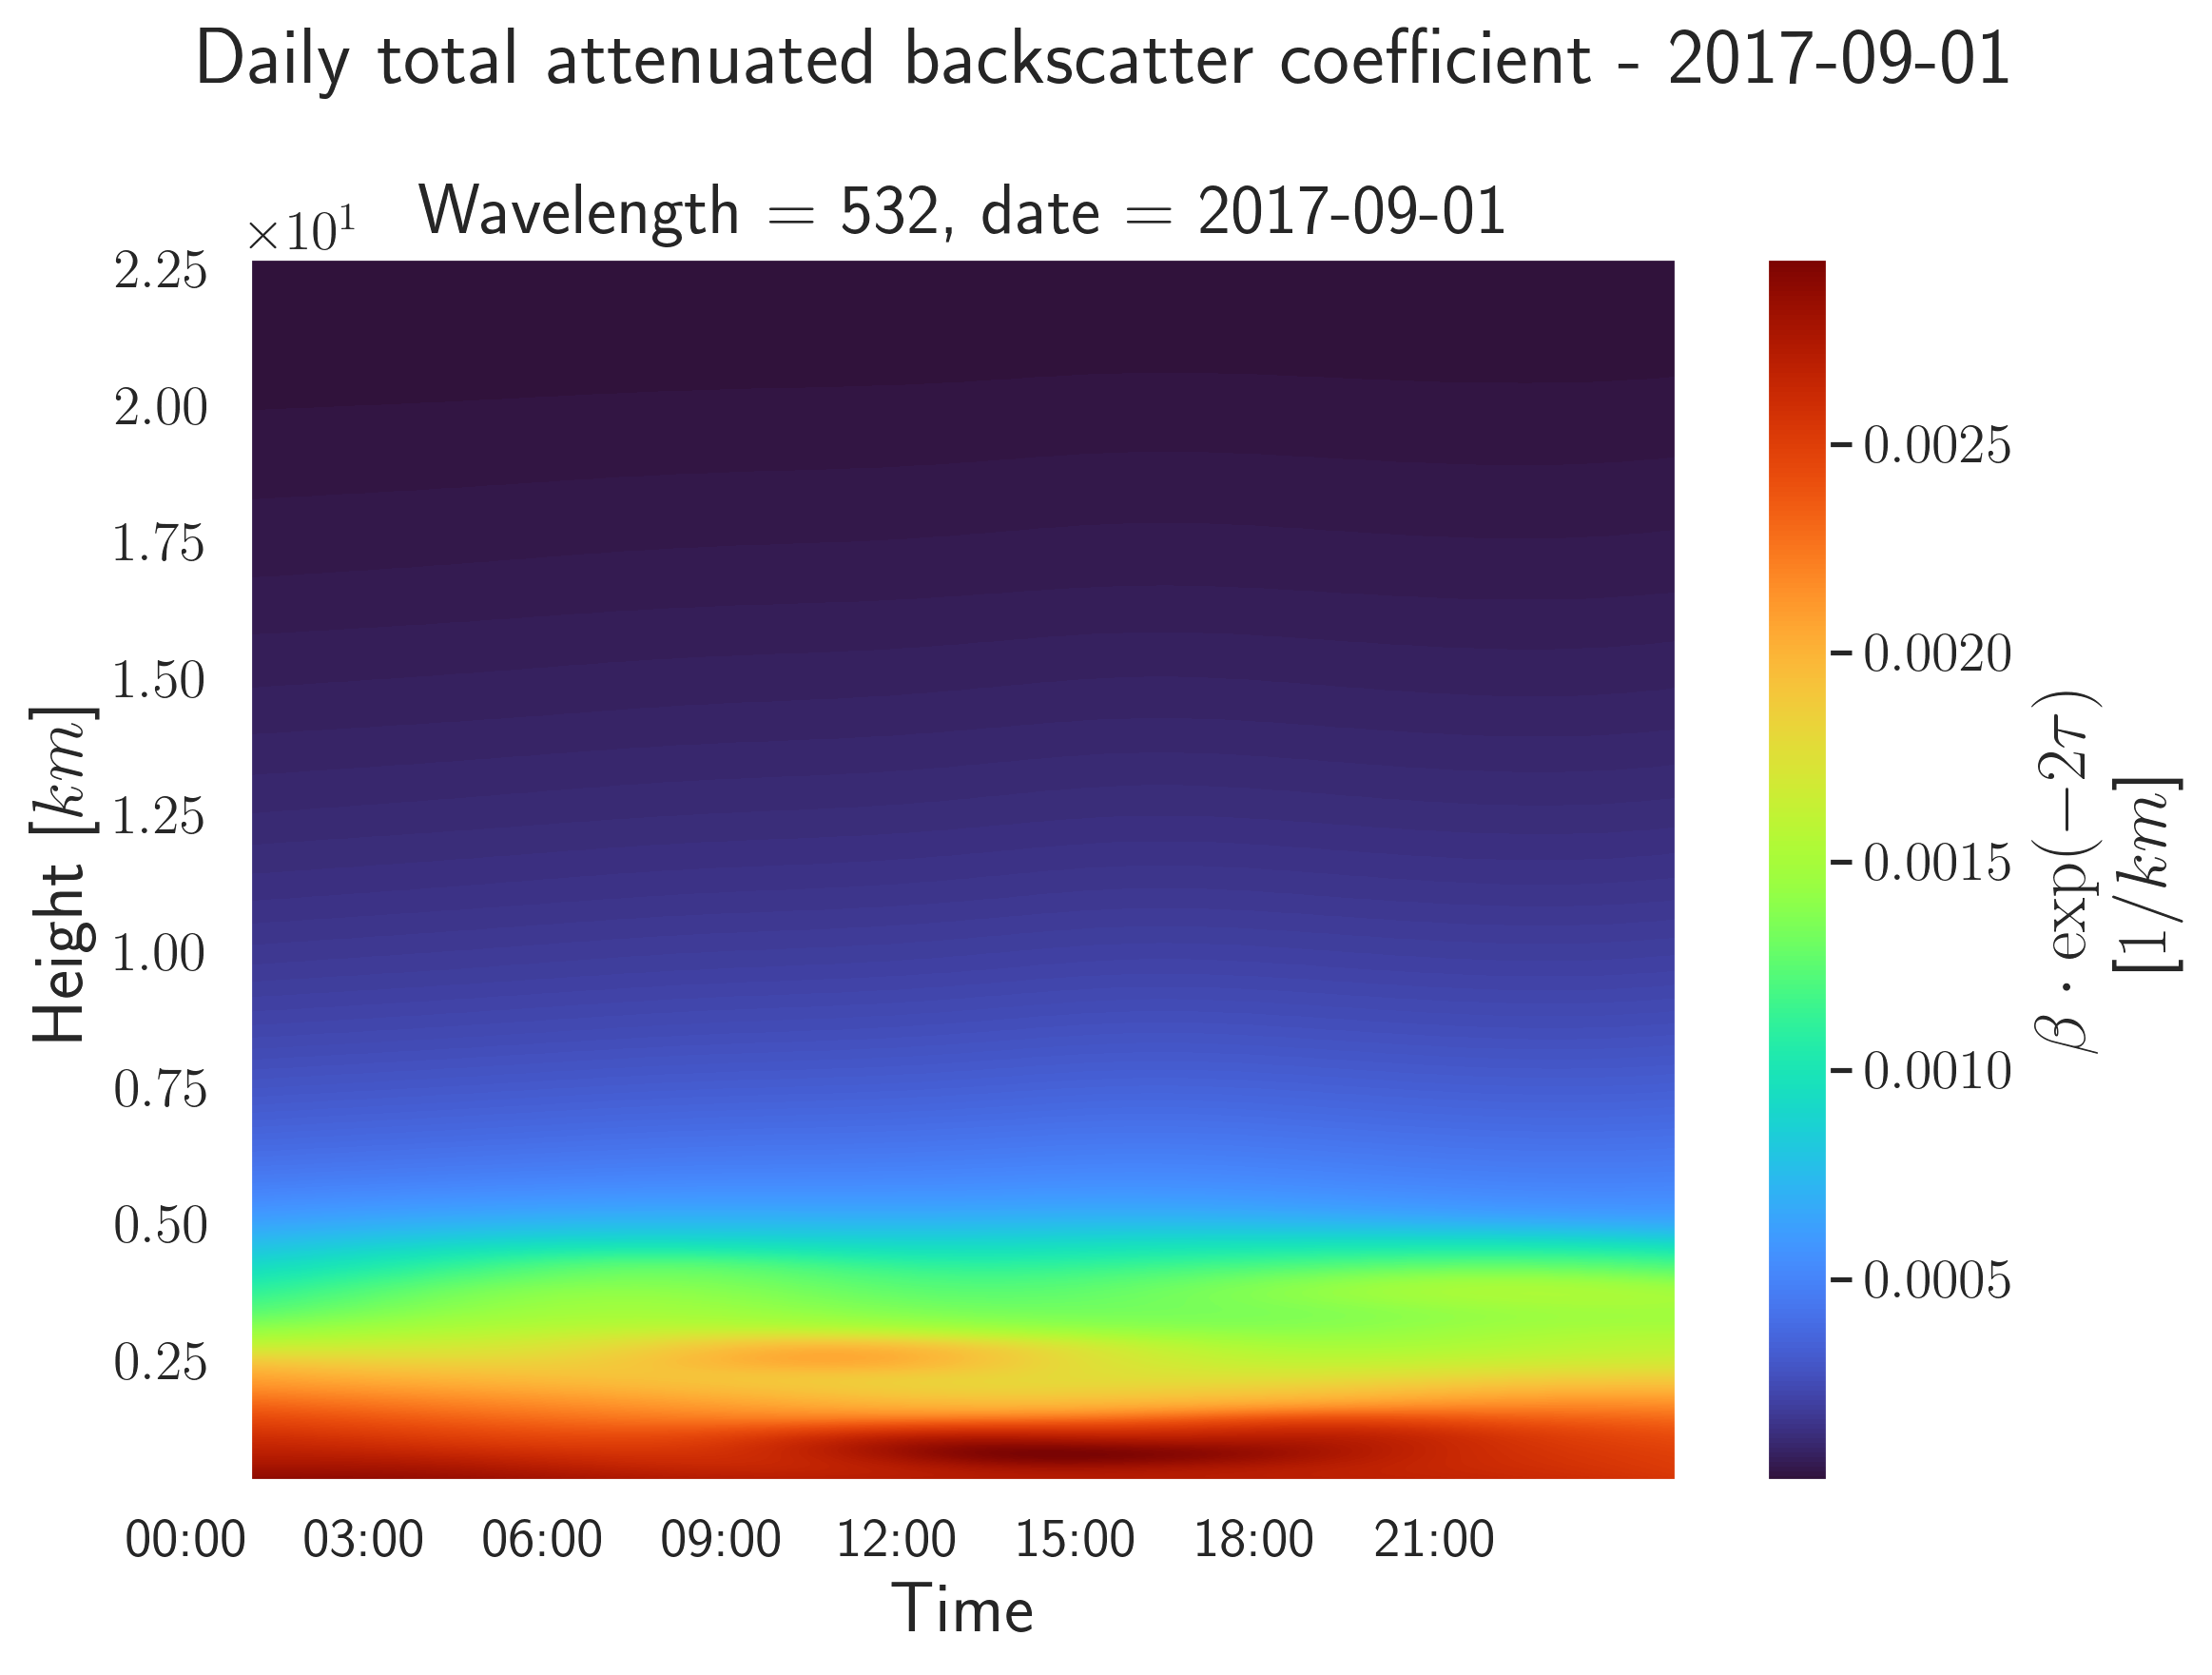

saved fig Dailytotalattenuatedbackscattercoefficient20170901


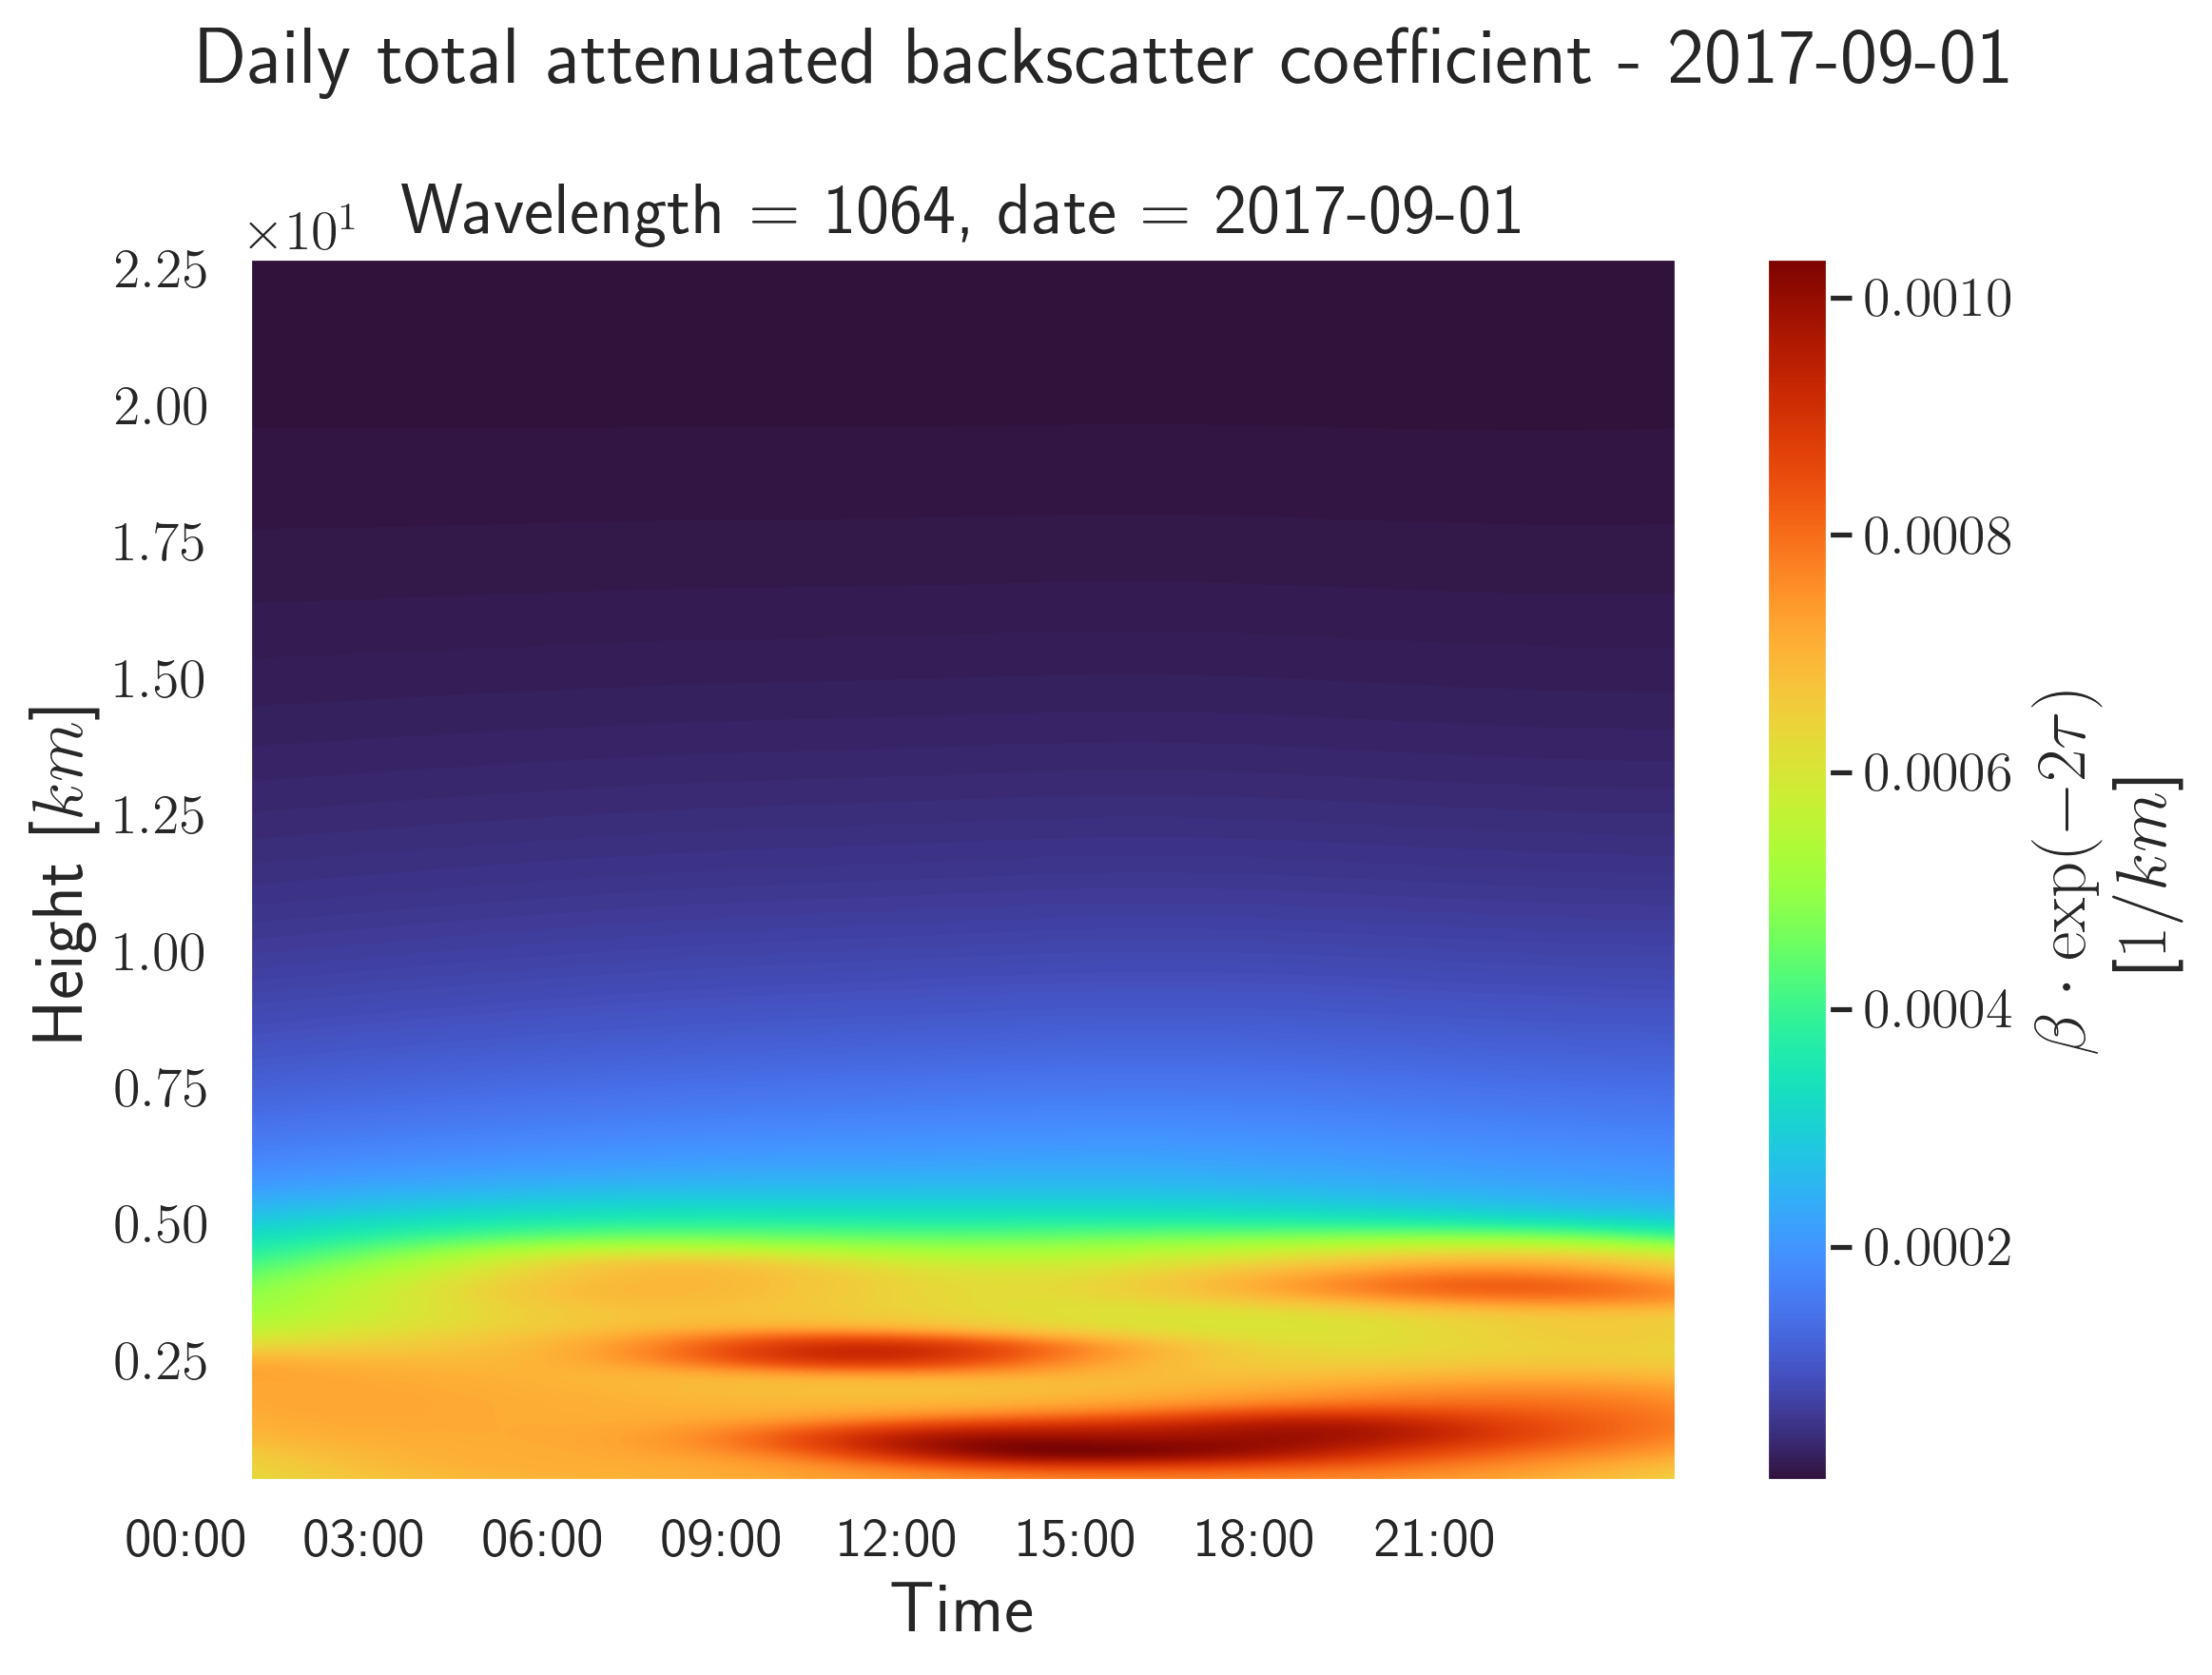

saved fig GeneratedRangeCorrectedLidarSignal20170901


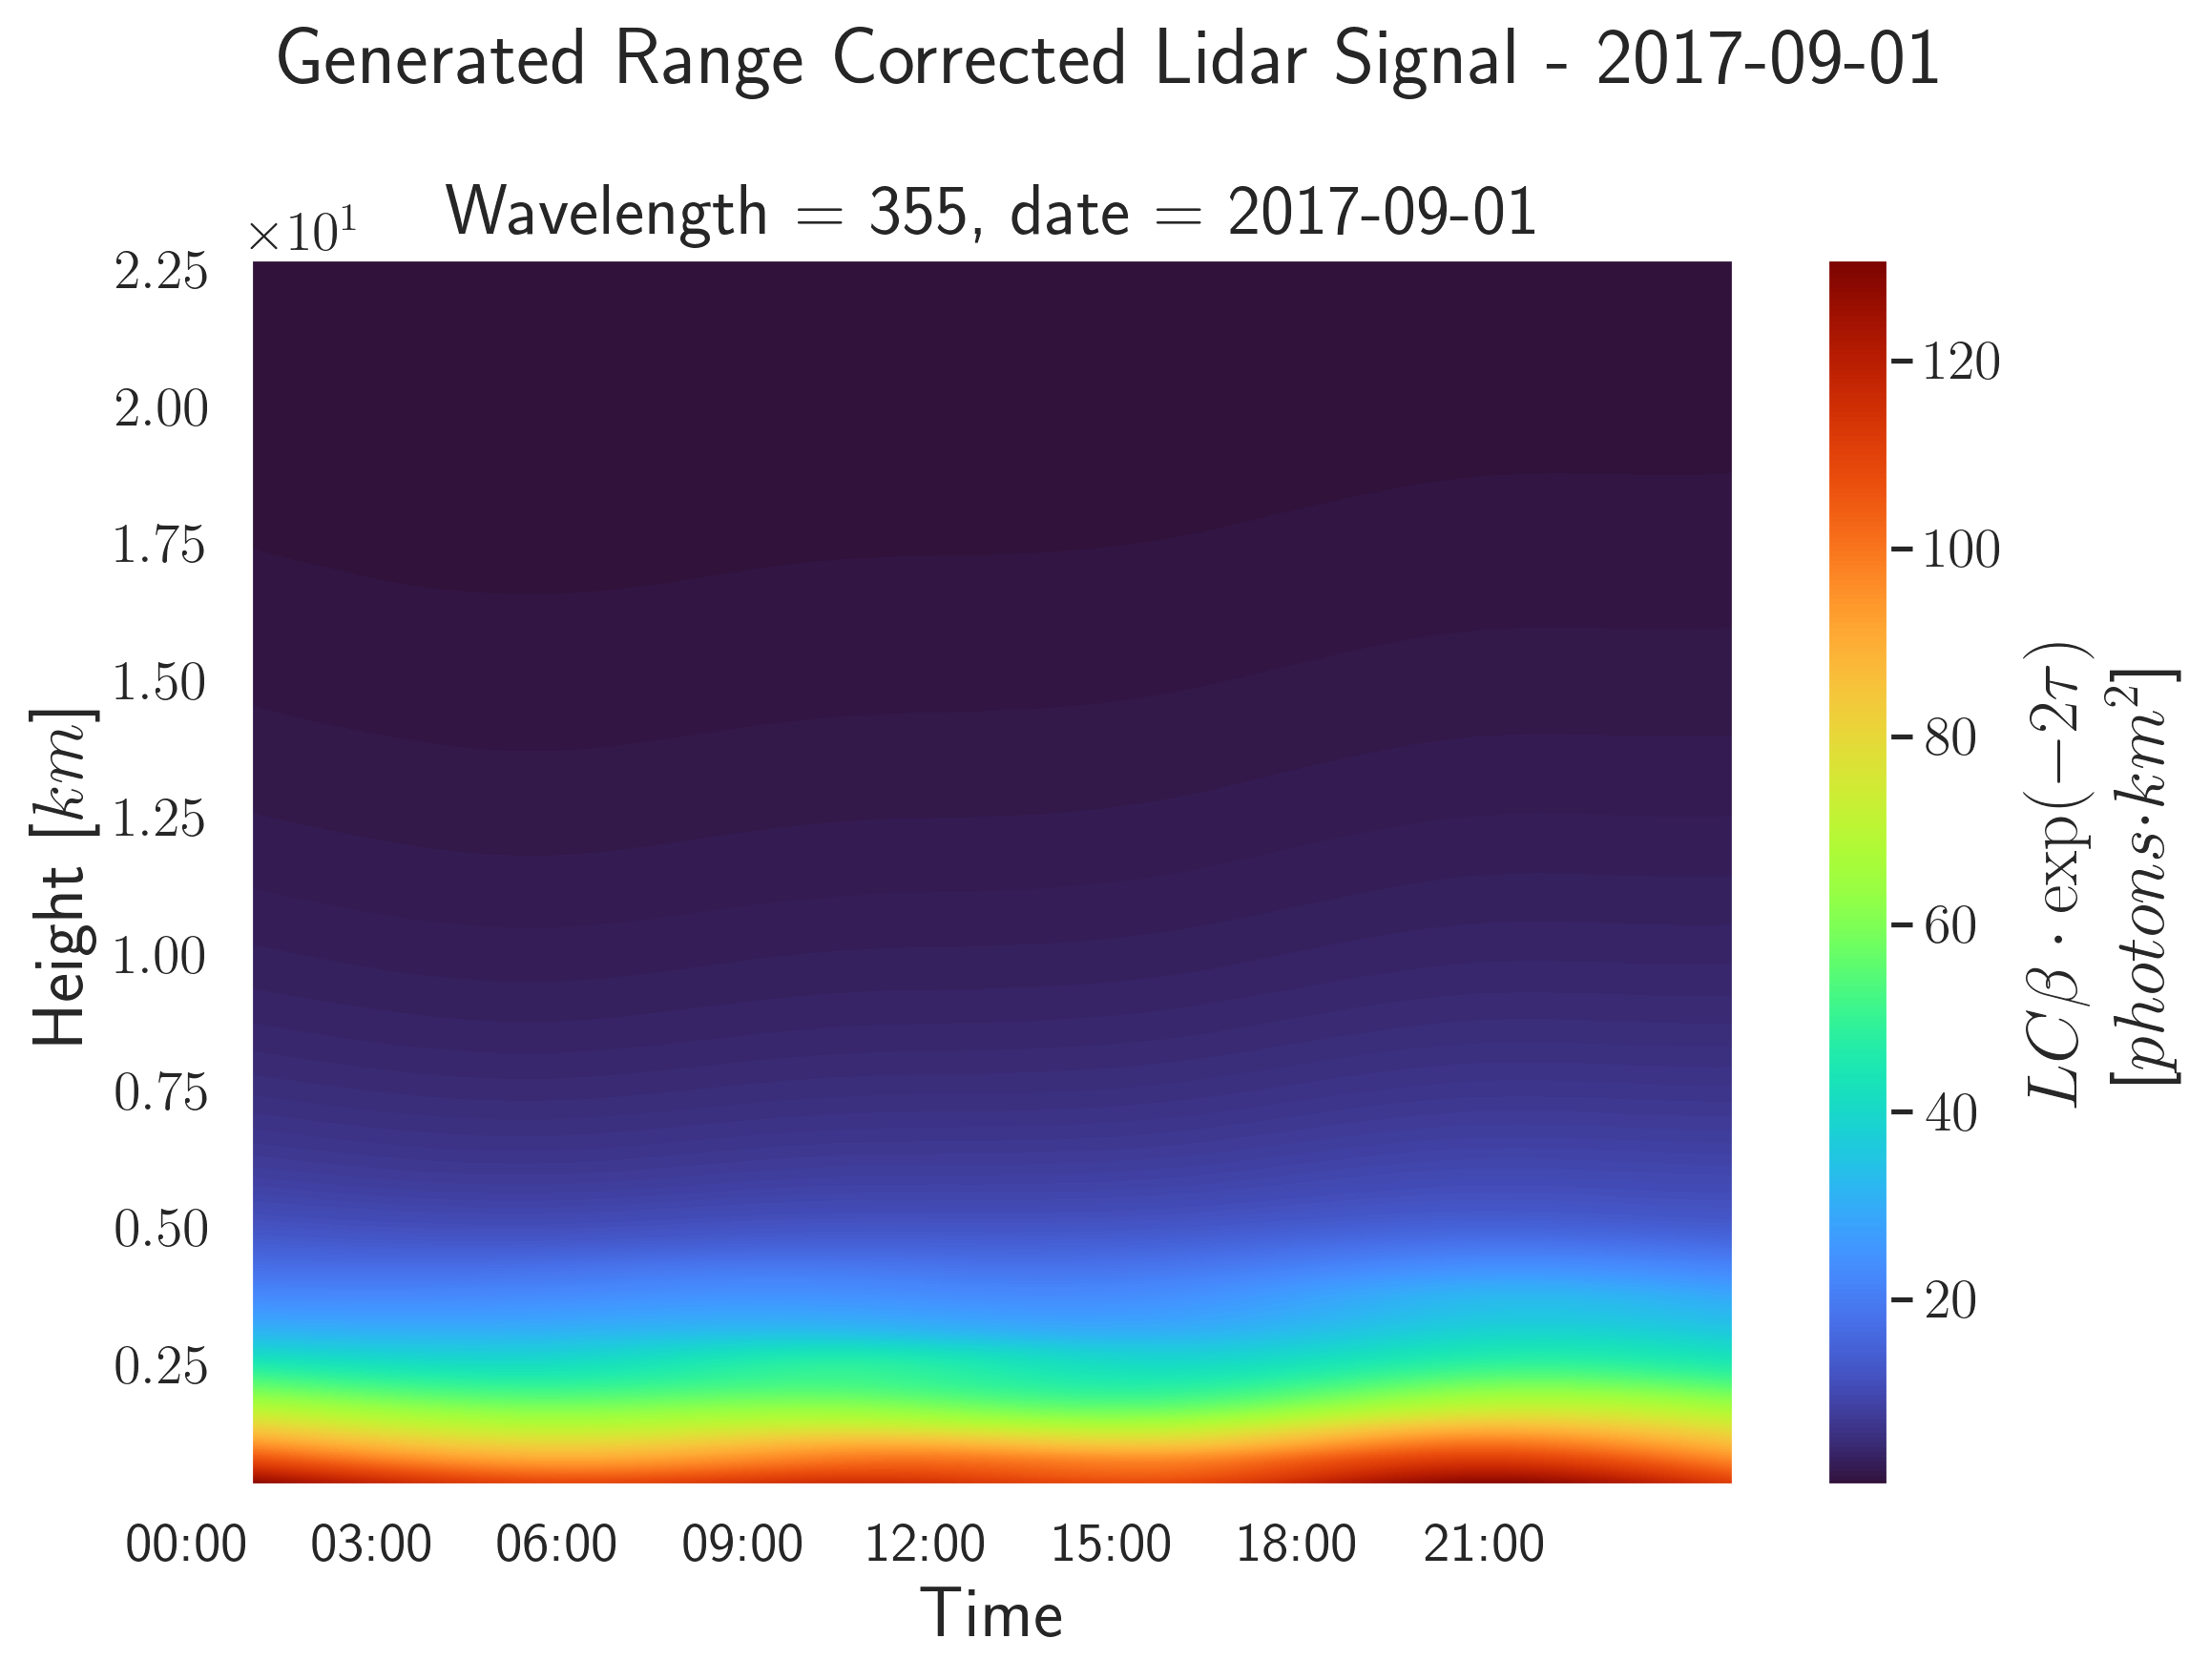

saved fig GeneratedRangeCorrectedLidarSignal20170901


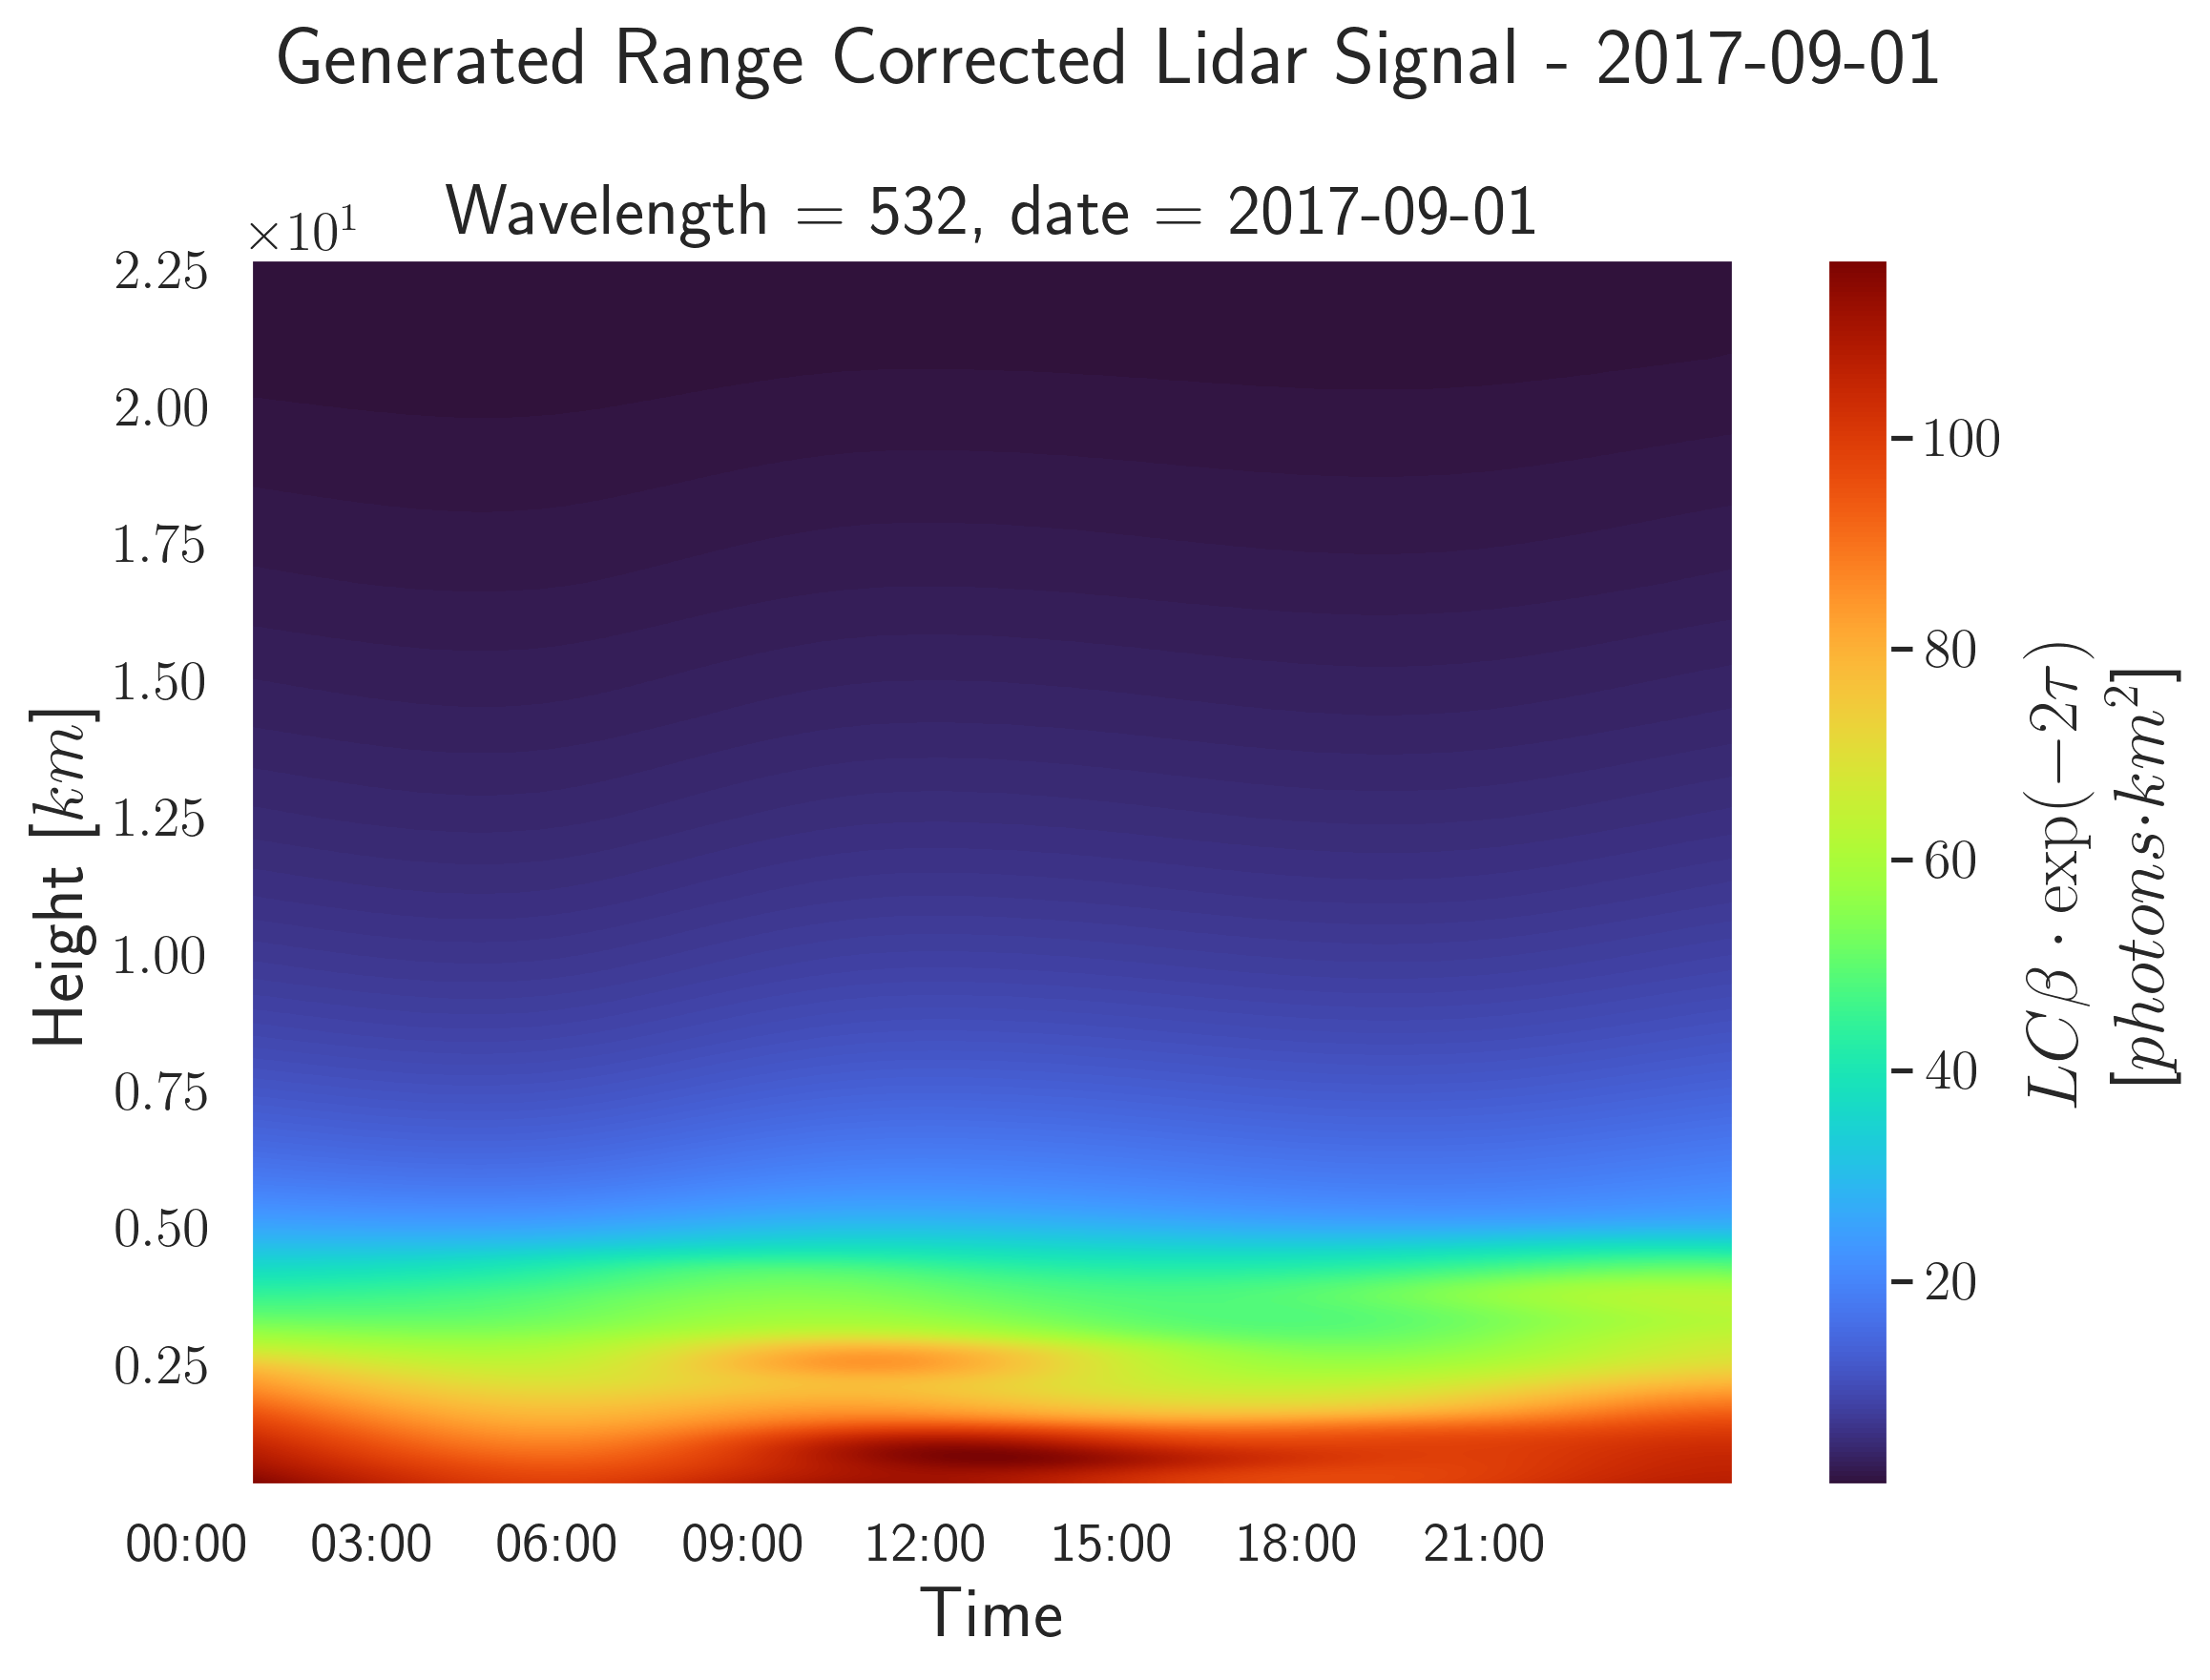

In [ ]:
# Daily angstrom exponent (42)
gen_den_utils.get_angstrom_ds(station, day_date, ds_day_params)

# Daily LR (53)
gen_den_utils.get_LR_ds(station, day_date, ds_day_params)

# Daily optical density (alpha and beta) (48, 54)
vis_utils.plot_daily_profile(aerosol_ds.beta, height_slice=slice(0, 15), save_fig=True)
vis_utils.plot_daily_profile(aerosol_ds.sigma, height_slice=slice(0, 15), save_fig=True)

# Attenuated backscatter (61)
for wavelength in signal_ds.Wavelength.values:
    ds = signal_ds.attbsc.sel(Wavelength=wavelength)
    # ds.Height['units'] = r"$\rm km$"
    vis_utils.plot_daily_profile(ds.where(ds<800), figsize=(8,6), save_fig=True)

# range corrected signal (79)
for wavelength in signal_ds.Wavelength.values:
    ds = signal_ds.range_corr.sel(Wavelength=wavelength)
    vis_utils.plot_daily_profile(ds.where(ds<800), figsize=(8,6), save_fig=True)

# range corrected measurement (115)
for wavelength in lidar_ds.Wavelength.values:
    ds = lidar_ds.range_corr.sel(Wavelength=wavelength)
    vis_utils.plot_daily_profile(ds.where(ds<800), figsize=(8,6), save_fig=True)

# Daily bg (98)
plot_bg_one_day(bg_year_params_ds, day_date)

# Half yearly bg
c_day = datetime(2017, 1, 1)
plot_bg_part_of_year(bg_year_params_ds, dslice=slice(c_day, c_day + timedelta(days=181) - timedelta(seconds=30)))

# Plot 2nd half of the year
plot_bg_part_of_year(bg_year_params_ds, dslice=slice(c_day, c_day + timedelta(days=184) - timedelta(seconds=30)))


# Daily rho and temporarily normalized rho (rhotnorm)(37, 38)
# TODO - Uncomment if have density
# TODO density_ds.rho or density_ds.merged?
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
# density_ds.merged.plot(cmap='turbo', ax=ax)
# ax.set_title(density_ds.merged.info)
# ax.xaxis.set_major_formatter(vis_utils.TIMEFORMAT)
# ax.xaxis.set_tick_params(rotation=0)
# plt.tight_layout()
# plt.show()
#
#
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
# density_ds.rho_tnorm.plot(cmap='turbo')
# plt.title('Temporally Normalized density')
# ax.xaxis.set_major_formatter(vis_utils.TIMEFORMAT)
# ax.xaxis.set_tick_params(rotation=0)
# plt.show()



# TODO  overlap - slide 110 - generate_overlap_params(n_samples = 8) from overlap notebook


# LC (63, 70)
parser = utils.get_base_arguments()
args = parser.parse_args(["-n", station_name, "--plot_results",
                          "--start_date", "2017-09-01", "--end_date", "2017-09-31"])
# TODO make sure y axis aligns
# LC 9-10 months
# format x axis months + day (without year) + rotation=0 # + daily (slide 71)

generate_LC_pattern_main(params=args)
